Importing the Dependencies

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Importing the Boston House Price Dataset

In [22]:
# house_price_dataset = sklearn.datasets.load_p

house_price_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Project 3/housing.csv', header = None)


In [23]:
house_price_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [24]:
df = house_price_dataset

In [28]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']


In [29]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [32]:
house_price_dataframe = df

In [33]:
house_price_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [34]:
#checking the number of rows and columns in the data frame
house_price_dataframe.shape

(506, 14)

In [36]:
#check for any missing values
house_price_dataframe.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [37]:
hp_dataset = house_price_dataframe

In [43]:
hp_dataset.dropna(subset=['PRICE'], inplace=True) #Dropped the rows with null values

In [44]:
hp_dataset.shape

(452, 14)

In [45]:
hp_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [46]:
#statistical measures of the dataset
hp_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


Understanding the Correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

Correlation represents the relationship between 2 variables.

In [48]:
correlation = hp_dataset.corr()

In [49]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


<Axes: >

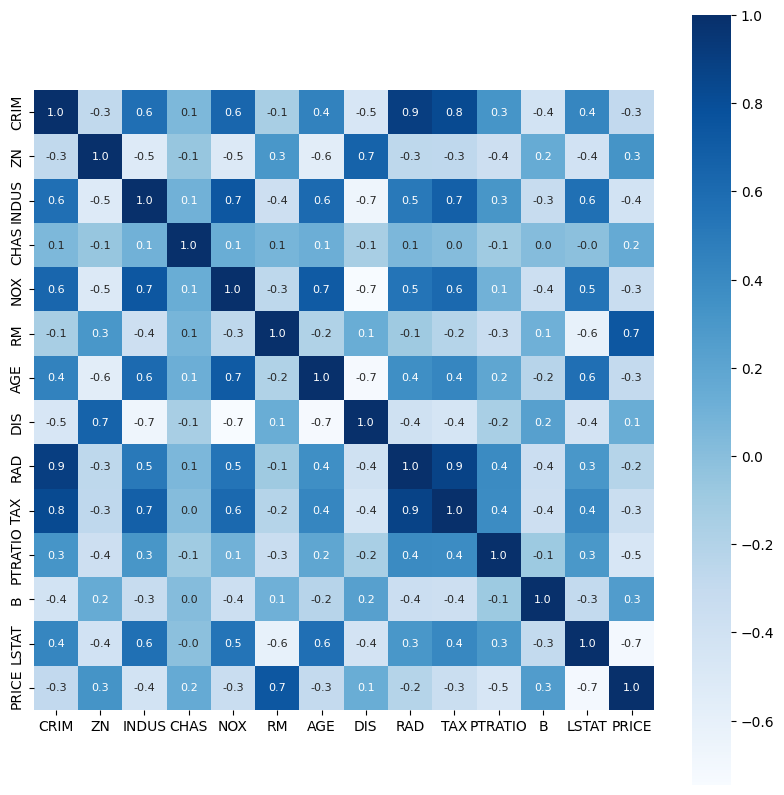

In [53]:
#Constructing heatmap to understand the correlation

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8},cmap = 'Blues')

#cbar is the color bar
# fmt means the float values ~ one value after the decimal point
# annot means annotations of the feature names and values
# annot size is the size of the labels
# cmap is the color of the heatmap

Splitting the data and Target

In [54]:
X = hp_dataset.drop(columns='PRICE', axis = 1)
Y = hp_dataset['PRICE']

In [57]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into Training data and Test data

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(452, 13) (361, 13) (91, 13)


Model Training

XGBoost Regression Model - type of decision tree model ~ ensemble model


In [62]:
# loading the model
model = XGBRegressor()

In [63]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [64]:
#accuracy for prediction on training data

training_data_prediction = model.predict(X_train)


In [65]:
print(training_data_prediction)

[18.537434  23.31972   35.10681   11.699637  21.094282  24.801191
 23.16662   50.00028   21.496391  19.615652  17.728632  24.195019
 21.011177  21.997723  13.500068  15.601914  19.694904  43.993843
 49.99664   32.000324  12.697658  21.208534  19.916264  17.400663
 17.205498  15.007733  15.214782  12.800121  34.90384   17.54021
 16.106813  25.110785  29.802713  48.805477  16.104832  19.314516
 24.800497  26.973886  11.485003  20.798492  20.993586  30.042734
 19.490978  34.898697  23.601288  20.006762  20.589638  36.399277
 21.201876  19.388212  36.004795  33.406593  25.282446  30.098976
  9.507115  17.586273  22.195322  24.995304  13.405363  37.900948
 21.092783  29.101976  20.382294  20.602924  29.40602   39.800076
 41.30293   49.99413    8.092422  13.798769  50.001385  19.797709
 29.069962  46.697937  18.902916  31.72517   33.193302  23.100851
 13.108488  18.798815  31.10078   17.985617  30.089016  14.895809
 28.401659  14.59201   20.315578  25.037802  43.808876  20.389729
  8.530018 

In [66]:
# R Squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R squared Error :', score_1) # this value should be close to 1; if it is close to 10 or more -> the model is not performing well
# the less the value, the more accurate the model is

print('Mean Absolute Error :', score_2)
#


R squared Error : 0.999997517721634
Mean Absolute Error : 0.00953138066130667


Visualizing the actual Prices and predicted prices

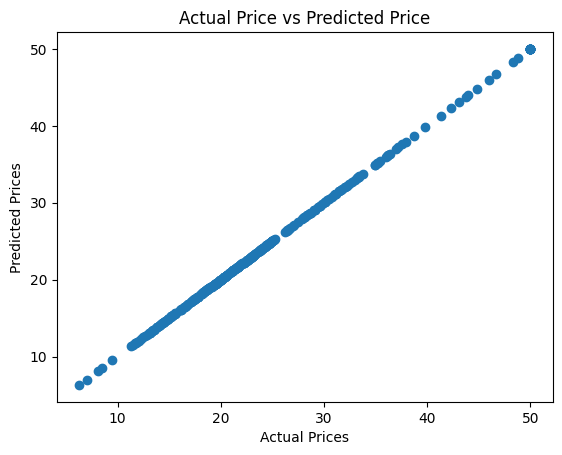

In [71]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

#the values predicted are very similar to the actual prices

Prediction on Test Data

In [67]:
test_data_prediction = model.predict(X_test)


In [68]:
# R Squared error
test_score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute error
test_score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R squared Error :', test_score_1) # this value should be close to 1; if it is close to 10 or more -> the model is not performing well
# the less the value, the more accurate the model is

print('Mean Absolute Error :', test_score_2)
#

R squared Error : 0.8408368017346262
Mean Absolute Error : 2.5215628194284965
